In [1]:
import random
import requests
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# проверяю работу рандома =
random.randrange(-150,150)/1000

-0.098

# Подготовка данных

In [4]:
# функция что достает данные из укрэнерго
def Energy_Parcer():
    url = 'https://ua.energy/wp-admin/admin-ajax.php' # название сервера который присылает данные на сайт
    payload = { # параметры ответа
        "Host": "ua.energy",
        "Connection": "keep-alive",
        "Content-Length": '75',
        "Origin": "https://ua.energy",
        "X-Requested-With": "XMLHttpRequest",
        "User-Agent": "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36",
        "Content-Type": "application/x-www-form-urlencoded; charset=UTF-8",
        "Accept": "*/*",
        "Referer": "https://ua.energy/diyalnist/dyspetcherska-informatsiya/dobovyj-grafik-vyrobnytstva-spozhyvannya-e-e/",
        "Accept-Encoding": "gzip, deflate, br",
        "Accept-Language": "ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7",
        "Cookie": "_ga=GA1.2.1756074011.1542635370; _gid=GA1.2.785433389.1542635370; _fbp=fb.1.1542635370134.1141896228; pll_language=uk"
    }

    headers = {}
    over = {'action':'get_data_oes', 'report_date': '27.11.2018', 'type':'consumption', 'rnd': '0.478195319721614'} # параметры запроса
    return requests.post(url, data=over, json=payload).json()


In [5]:
# выгружаю данные
data = Energy_Parcer()

In [7]:
# оставляю только данные за 28.08
df = pd.DataFrame(data)
new_data = df[df.date.str.contains('2019-08-28')]

In [6]:
new_data.date = new_data.date.str.replace('2019-08-28', '')

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


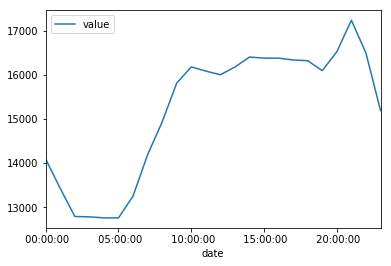

In [7]:
new_data.set_index('date').plot()

In [8]:
# оставляю только данные за три часа
target_data = new_data.loc['49540':'49542']

In [10]:
target_data

,date,value
49540,2019-08-28 15:00:00,16385
49541,2019-08-28 16:00:00,16384
49542,2019-08-28 17:00:00,16343


In [12]:
# произвожу случайный разброс данных по тридцатисекундным интервалам
separated = []
for i in target_data.value:
    data = [i/120 for j in range(120)]
    separated.extend(data)

In [13]:
separated = [(i + i*random.randrange(-150,150)/1000) for i in separated]

In [14]:
separated = [i/5 for i in separated]
separated

[26.652933333333333,
 28.072966666666666,
 23.45785833333333,
 23.676325,
 26.89870833333333,
 29.68415833333333,
 23.567091666666663,
 25.314825,
 29.219916666666666,
 24.60480833333333,
 27.14448333333333,
 24.222491666666663,
 28.673749999999995,
 30.694566666666663,
 24.632116666666665,
 25.779066666666665,
 27.499491666666664,
 31.10419166666666,
 25.478675,
 29.110683333333334,
 25.069049999999997,
 27.608725,
 23.867483333333332,
 28.564516666666663,
 23.539783333333332,
 30.339558333333333,
 30.803799999999995,
 27.55410833333333,
 23.78555833333333,
 31.022266666666667,
 25.50598333333333,
 28.728366666666666,
 30.011858333333333,
 30.011858333333333,
 29.92993333333333,
 23.5944,
 29.848008333333333,
 29.957241666666665,
 24.167875,
 31.213424999999994,
 30.74918333333333,
 25.669833333333333,
 26.81678333333333,
 26.57100833333333,
 23.403241666666666,
 25.50598333333333,
 31.186116666666663,
 26.926016666666662,
 23.321316666666668,
 23.403241666666666,
 28.427974999999996,

In [14]:
df = pd.DataFrame(separated, columns=['MWt'])

In [25]:
df.head()

,MWt
0,25.505983
1,30.885725
2,24.058642
3,29.438383
4,27.663342


In [24]:
import time, datetime

In [25]:
dt = datetime.datetime.strptime('2019-08-28 14:00:00', '%Y-%m-%d %H:%M:%S')

In [26]:
dt = datetime.datetime.timestamp(dt)
dt

1566990000.0

In [27]:
datetime.datetime.fromtimestamp(dt)

datetime.datetime(2019, 8, 28, 14, 0)

In [28]:
dt_lst  = []
for i in range(len(df)):
    dt_lst.append(dt+i*30)

In [20]:
dt_lst

[1566990000.0,
 1566990030.0,
 1566990060.0,
 1566990090.0,
 1566990120.0,
 1566990150.0,
 1566990180.0,
 1566990210.0,
 1566990240.0,
 1566990270.0,
 1566990300.0,
 1566990330.0,
 1566990360.0,
 1566990390.0,
 1566990420.0,
 1566990450.0,
 1566990480.0,
 1566990510.0,
 1566990540.0,
 1566990570.0,
 1566990600.0,
 1566990630.0,
 1566990660.0,
 1566990690.0,
 1566990720.0,
 1566990750.0,
 1566990780.0,
 1566990810.0,
 1566990840.0,
 1566990870.0,
 1566990900.0,
 1566990930.0,
 1566990960.0,
 1566990990.0,
 1566991020.0,
 1566991050.0,
 1566991080.0,
 1566991110.0,
 1566991140.0,
 1566991170.0,
 1566991200.0,
 1566991230.0,
 1566991260.0,
 1566991290.0,
 1566991320.0,
 1566991350.0,
 1566991380.0,
 1566991410.0,
 1566991440.0,
 1566991470.0,
 1566991500.0,
 1566991530.0,
 1566991560.0,
 1566991590.0,
 1566991620.0,
 1566991650.0,
 1566991680.0,
 1566991710.0,
 1566991740.0,
 1566991770.0,
 1566991800.0,
 1566991830.0,
 1566991860.0,
 1566991890.0,
 1566991920.0,
 1566991950.0,
 156699198

In [30]:
df['dt_tmstmp'] = dt_lst

In [22]:
df['dt'] = pd.to_datetime(df.dt_tmstmp, unit='s')

In [23]:
df

,date,value,dt_tmstmp,dt
0,2014-01-01 01:00:00,20586,1.566990e+09,2019-08-28 11:00:00
1,2014-01-01 02:00:00,19665,1.566990e+09,2019-08-28 11:00:30
2,2014-01-01 03:00:00,19107,1.566990e+09,2019-08-28 11:01:00
3,2014-01-01 04:00:00,18453,1.566990e+09,2019-08-28 11:01:30
4,2014-01-01 05:00:00,18072,1.566990e+09,2019-08-28 11:02:00
5,2014-01-01 06:00:00,17911,1.566990e+09,2019-08-28 11:02:30
6,2014-01-01 07:00:00,17565,1.566990e+09,2019-08-28 11:03:00
7,2014-01-01 08:00:00,17480,1.566990e+09,2019-08-28 11:03:30
8,2014-01-01 09:00:00,18276,1.566990e+09,2019-08-28 11:04:00
9,2014-01-01 10:00:00,19014,1.566990e+09,2019-08-28 11:04:30


# Хольт Винтерс

In [80]:
from xgboost import XGBRegressor

In [97]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

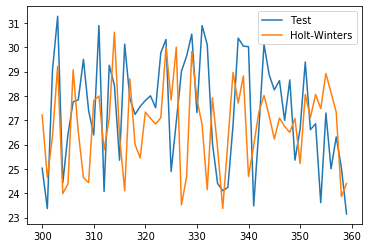

In [107]:
train, test = df['MWt'].iloc[:300], df['MWt'].iloc[300:]
model = ExponentialSmoothing(train, seasonal='mul', seasonal_periods=120).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])


plt.plot( test, label='Test')
plt.plot( pred, label='Holt-Winters')
plt.legend(loc='best')

In [123]:
dff = pd.DataFrame({'test':test, 'HW_pred':pred})

In [124]:
dff

,test,HW_pred
300,25.032028,27.211849
301,23.370490,24.645002
302,29.063302,26.338068
303,31.269607,29.219046
304,24.432785,23.989622
305,26.421183,24.385603
306,27.755862,29.068834
307,27.837577,26.529267
308,29.499115,24.645054
309,27.401763,24.440179


In [125]:
dff['errors %'] = 100*abs(dff['test'] - dff['HW_pred'])/dff['test']

In [126]:
dff.head()

,test,HW_pred,errors %
300,25.032028,27.211849,8.708124
301,23.370490,24.645002,5.453510
302,29.063302,26.338068,9.376888
303,31.269607,29.219046,6.557681
304,24.432785,23.989622,1.813805


In [128]:
dff['errors %'].mean()

7.446976716496214

### Прогноз на будущее

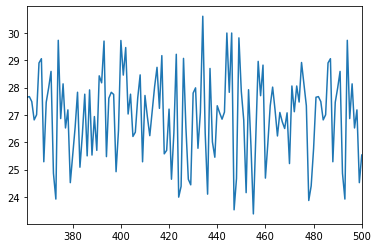

In [109]:
model.predict(start=361, end=500).plot()

# XGBoost

In [82]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    lst = []
    for i in range(len(df)):
        if i%2 == 0:
            lst.append(0)
        else:
            lst.append(1)
    df['30sec'] = lst
    df['min'] = df['dt'].dt.minute
    df['hour'] = df['dt'].dt.hour
    #df['dayofweek'] = df['dt'].dt.dayofweek
    

    return df[['30sec','min','hour']]

In [83]:
x = create_features(df)
y = df.MWt

In [84]:
xgb = XGBRegressor()

In [85]:
x_test, y_test = x.iloc[300:], y.iloc[300:]
x_train, y_train = x.iloc[:300], y.iloc[:300]

In [86]:
xgb.fit(x_train, y_train)

/home/adanick/Загрузки/Tutorials/myvenv/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/adanick/Загрузки/Tutorials/myvenv/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[14:24:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [87]:
pred = xgb.predict(x_test)

In [88]:
res = pd.DataFrame({'test': list(y_test), 'xgb_pred':pred})

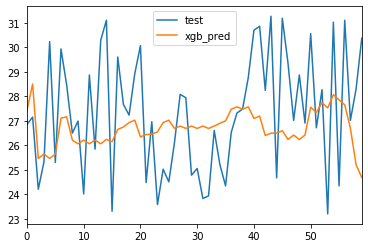

In [89]:
res.plot()

In [93]:
res['errors %'] = 100*abs(res['test'] - res['xgb_pred'])/res['test']
res

,test,xgb_pred,errors %
0,26.856997,27.428083,2.126398
1,27.156618,28.505247,4.966115
2,24.214878,25.470602,5.185753
3,25.331650,25.647503,1.246871
4,30.234550,25.470602,15.756636
5,25.304412,25.647503,1.355855
6,29.934928,27.108759,9.441043
7,28.464058,27.168789,4.550544
8,26.502898,26.218504,1.073069
9,26.993188,26.066010,3.434862


In [91]:
res['errors %'].mean()

7.519563725617794

### Прогноз на будущее

In [97]:
df.dt_tmstmp.iloc[-1]

1567000770.0

In [100]:
start = 360
end = 500
lst = []
last_point = df.dt_tmstmp.iloc[-1]
for i in range(end-start):
    last_point += 30
    lst.append(last_point)

In [101]:
lst

[1567000800.0,
 1567000830.0,
 1567000860.0,
 1567000890.0,
 1567000920.0,
 1567000950.0,
 1567000980.0,
 1567001010.0,
 1567001040.0,
 1567001070.0,
 1567001100.0,
 1567001130.0,
 1567001160.0,
 1567001190.0,
 1567001220.0,
 1567001250.0,
 1567001280.0,
 1567001310.0,
 1567001340.0,
 1567001370.0,
 1567001400.0,
 1567001430.0,
 1567001460.0,
 1567001490.0,
 1567001520.0,
 1567001550.0,
 1567001580.0,
 1567001610.0,
 1567001640.0,
 1567001670.0,
 1567001700.0,
 1567001730.0,
 1567001760.0,
 1567001790.0,
 1567001820.0,
 1567001850.0,
 1567001880.0,
 1567001910.0,
 1567001940.0,
 1567001970.0,
 1567002000.0,
 1567002030.0,
 1567002060.0,
 1567002090.0,
 1567002120.0,
 1567002150.0,
 1567002180.0,
 1567002210.0,
 1567002240.0,
 1567002270.0,
 1567002300.0,
 1567002330.0,
 1567002360.0,
 1567002390.0,
 1567002420.0,
 1567002450.0,
 1567002480.0,
 1567002510.0,
 1567002540.0,
 1567002570.0,
 1567002600.0,
 1567002630.0,
 1567002660.0,
 1567002690.0,
 1567002720.0,
 1567002750.0,
 156700278

In [102]:
dff = pd.DataFrame({"dt_tmstmp":lst})

In [103]:
dff['dt'] = pd.to_datetime(dff.dt_tmstmp, unit='s')

In [104]:
dff

,dt_tmstmp,dt
0,1.567001e+09,2019-08-28 14:00:00
1,1.567001e+09,2019-08-28 14:00:30
2,1.567001e+09,2019-08-28 14:01:00
3,1.567001e+09,2019-08-28 14:01:30
4,1.567001e+09,2019-08-28 14:02:00
5,1.567001e+09,2019-08-28 14:02:30
6,1.567001e+09,2019-08-28 14:03:00
7,1.567001e+09,2019-08-28 14:03:30
8,1.567001e+09,2019-08-28 14:04:00
9,1.567001e+09,2019-08-28 14:04:30


In [105]:
X = create_features(dff)

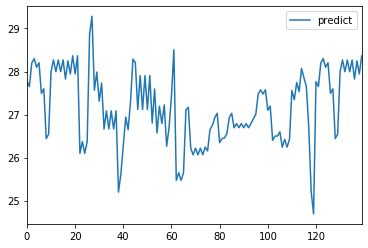

In [109]:
pd.DataFrame({"predict":xgb.predict(X)}).plot()

# Fuzzy Time Series

In [2]:
# библиотеки
import pandas as pd
import numpy as np

In [3]:
# массив входных данных в формате строки
a = """128
136
137
147
155
153
156
159
168
164
164
154
155
151
151
160
169
181
190
203 
198"""

In [5]:
# конвертирую в пайтоновский список
lst = [int(i) for i in a.split("\n")]

In [6]:
# количество элементов
len(lst)

21

In [7]:
# минимальный элемент
min(lst)

128

In [8]:
# максимальный элемент
max(lst)

203

In [9]:
# делаем список округленных чисел с интервалом 10 от наименьшего в списке до большего 
nlst = []
a = (int(min(lst)/10)*10)
begin = a-10
end = max(lst)//10 *10 + 10
for i in range(int((end-begin)/10)):
    nlst.append(a)
    a += 10
print(nlst)

[120, 130, 140, 150, 160, 170, 180, 190, 200, 210]


In [10]:
# делаем список интервалов
lst2 = []
for i in range(len(nlst)):
    if i!=len(nlst)-1:
        lst2.append((nlst[i], nlst[i+1]))
    else:
        pass
print(lst2)       
    

[(120, 130), (130, 140), (140, 150), (150, 160), (160, 170), (170, 180), (180, 190), (190, 200), (200, 210)]


In [11]:
# делаем словарь с ключами Аn и значениями - собственно интервалами
fuzzy_set = {f"A{i+1}":lst2[i] for i in range(len(lst2))}
fuzzy_set

{'A1': (120, 130),
 'A2': (130, 140),
 'A3': (140, 150),
 'A4': (150, 160),
 'A5': (160, 170),
 'A6': (170, 180),
 'A7': (180, 190),
 'A8': (190, 200),
 'A9': (200, 210)}

In [12]:
# делаем словарь с проверкой принадлежности каждого числа определенному диапазону
# где ключ - величина энергопотребления(элемент входного массива), а значение - название диапазона Аn
fuzzy_check = []
for i in lst:
    for j in fuzzy_set.keys():
        if fuzzy_set[j][0] < i <= fuzzy_set[j][1]:
            fuzzy_check.append({i:j})
fuzzy_check

[{128: 'A1'},
 {136: 'A2'},
 {137: 'A2'},
 {147: 'A3'},
 {155: 'A4'},
 {153: 'A4'},
 {156: 'A4'},
 {159: 'A4'},
 {168: 'A5'},
 {164: 'A5'},
 {164: 'A5'},
 {154: 'A4'},
 {155: 'A4'},
 {151: 'A4'},
 {151: 'A4'},
 {160: 'A4'},
 {169: 'A5'},
 {181: 'A7'},
 {190: 'A7'},
 {203: 'A9'},
 {198: 'A8'}]

In [14]:
# Лингвистическая характеристика диапазонов
fuzzy_desription = {"A1":"Чрезвычайно низкая", 
 "А2": "Очень низкая", # ...и так далее
    
}

In [15]:
# Функция которая создает таблицу(датафрейм) с принадлежностями каждой величины определенному промежутку
def fuzzy_table(lst, fuzzy_set):
    df = pd.DataFrame({i:[0 for j in range(len(lst))] for i in fuzzy_set.keys()})
    fuz_keys = list(fuzzy_set.keys())
    for i in range(len(lst)):
        for j in fuz_keys:
            if lst[i] > fuzzy_set[j][0] and lst[i] <= fuzzy_set[j][1]:
                df[j].iloc[i] = 1
                if fuz_keys.index(j) > 0:
                    df[fuz_keys[fuz_keys.index(j)-1]].iloc[i] = 0.5
                if fuz_keys.index(j) < len(fuz_keys)-1:   
                    df[fuz_keys[fuz_keys.index(j)+1]].iloc[i] = 0.5
                if fuz_keys.index(j) > 1:
                    df[fuz_keys[fuz_keys.index(j)-2]].iloc[i] = 0.1
                if fuz_keys.index(j) < len(fuz_keys)-2:   
                    df[fuz_keys[fuz_keys.index(j)+2]].iloc[i] = 0.1
    df['value'] = lst
                
    return df
                    
                
    

In [16]:
# Создаем эту таблицу описанную вышу вызвав функцию. Таблица1
df = fuzzy_table(lst, fuzzy_set)
df

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,value
0,1.0,0.5,0.1,0.0,0.0,0.0,0.0,0.0,0.0,128
1,0.5,1.0,0.5,0.1,0.0,0.0,0.0,0.0,0.0,136
2,0.5,1.0,0.5,0.1,0.0,0.0,0.0,0.0,0.0,137
3,0.1,0.5,1.0,0.5,0.1,0.0,0.0,0.0,0.0,147
4,0.0,0.1,0.5,1.0,0.5,0.1,0.0,0.0,0.0,155
5,0.0,0.1,0.5,1.0,0.5,0.1,0.0,0.0,0.0,153
6,0.0,0.1,0.5,1.0,0.5,0.1,0.0,0.0,0.0,156
7,0.0,0.1,0.5,1.0,0.5,0.1,0.0,0.0,0.0,159
8,0.0,0.0,0.1,0.5,1.0,0.5,0.1,0.0,0.0,168
9,0.0,0.0,0.1,0.5,1.0,0.5,0.1,0.0,0.0,164


In [17]:
# Создаем список названий интервалов для каждого значения энергопотребления в момент времени t...t+n
marks = [list(i.values())[0] for i in fuzzy_check]
marks

['A1',
 'A2',
 'A2',
 'A3',
 'A4',
 'A4',
 'A4',
 'A4',
 'A5',
 'A5',
 'A5',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A5',
 'A7',
 'A7',
 'A9',
 'A8']

In [18]:
# Взаимосвязи между величиной и следующим значением величины
new_fuz = []
indexes = []
check = []
for i in range(len(marks)):
    if i == 0:
        pass
    else:
        if (marks[i-1], marks[i]) not in check:
            check.append((marks[i-1], marks[i]))
            new_fuz.append((marks[i-1], marks[i]))
            indexes.append((i-1,i))

In [19]:
new_fuz

[('A1', 'A2'),
 ('A2', 'A2'),
 ('A2', 'A3'),
 ('A3', 'A4'),
 ('A4', 'A4'),
 ('A4', 'A5'),
 ('A5', 'A5'),
 ('A5', 'A4'),
 ('A5', 'A7'),
 ('A7', 'A7'),
 ('A7', 'A9'),
 ('A9', 'A8')]

In [20]:
indexes

[(0, 1),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (7, 8),
 (8, 9),
 (10, 11),
 (16, 17),
 (17, 18),
 (18, 19),
 (19, 20)]

In [21]:
# для дальнейших вычислений мне нужно было удолить столбец value из таблицы1
df = df.drop(['value'], axis = 1)

In [22]:
# проверяю предыдущий шаг
list(df.iloc[1])

[0.5, 1.0, 0.5, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0]

In [23]:
# Создаем функцию для генерации матриц Ri
def fuzzy_raws(df, indexes):
    fuzzy_raws = {}
    for a in indexes:
        array = []
        for i in list(df.iloc[a[0]]):
            raw = []
            for j in list(df.iloc[a[1]]):
                if i <= j:
                    raw.append(i)
                else:
                    raw.append(j)
            array.append(raw)
        fuzzy_raws[f"R{indexes.index(a) + 1}"] = array
    return fuzzy_raws

In [24]:
# Выполняем функцию из пред шага и сохраняем в переменную fr
fr = fuzzy_raws(df, indexes)
fr

{'R1': [[0.5, 1.0, 0.5, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.5, 0.5, 0.5, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
 'R10': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1],
  [0.0, 0.0, 0.0, 0.0, 0.1, 0.5, 0.5, 0.5, 0.1],
  [0.0, 0.0, 0.0, 0.0, 0.1, 0.5, 1.0, 0.5, 0.1],
  [0.0, 0.0, 0.0, 0.0, 0.1, 0.5, 0.5, 0.5, 0.1],
  [0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1]],
 'R11': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [25]:
# Находим конечную матрицу R
R = []
for i in range(len(fr[list(fr.keys())[0]])):
    raw = []
    for j in range(len(fr[list(fr.keys())[0]])):
        raw.append(max([fr[key][i][j] for key in fr.keys() ]))
    R.append(raw)
R

[[0.5, 1.0, 0.5, 0.5, 0.1, 0.1, 0.0, 0.0, 0.0],
 [0.5, 1.0, 1.0, 0.5, 0.5, 0.1, 0.1, 0.0, 0.0],
 [0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.1, 0.1, 0.1],
 [0.1, 0.1, 0.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.1],
 [0.0, 0.1, 0.5, 1.0, 1.0, 0.5, 1.0, 0.5, 0.1],
 [0.0, 0.1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
 [0.0, 0.1, 0.1, 0.1, 0.1, 0.5, 1.0, 0.5, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.1, 0.5, 0.5, 0.5, 0.5],
 [0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.5, 1.0, 0.5]]

In [26]:
# проверка транспонации матрицы с помощью нампай
np.array(R).T[0]

array([0.5, 0.5, 0.5, 0.1, 0. , 0. , 0. , 0. , 0. ])

In [27]:
# Находит конечное распределение принадлежности к интервалам и производит прогноз
def predict_fuzzy(n):
    n = n-2
    hist = list(df.iloc[n])
    data = np.array(R).T
    A = []
    for i in data:
        m = max([min(hist[k], i[k]) for k in range(len(i))])
        A.append(m)
    ckeck = [i for i in A if i == 1]
    
    for i in A:
        if len(check) > 1:
            pass
        else:
            if i == 1:
                index = A.index(i)
    return A #sum(lst2[index])/2
            
            

In [28]:
for i in range(len(lst)):
    print(f"t={i+2}")
    print(f"Прогноз: {predict_fuzzy(i+2)}")

t=2
Прогноз: [0.5, 1.0, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1]
t=3
Прогноз: [0.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1]
t=4
Прогноз: [0.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1]
t=5
Прогноз: [0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 0.5, 0.1]
t=6
Прогноз: [0.5, 0.5, 0.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.1]
t=7
Прогноз: [0.5, 0.5, 0.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.1]
t=8
Прогноз: [0.5, 0.5, 0.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.1]
t=9
Прогноз: [0.5, 0.5, 0.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.1]
t=10
Прогноз: [0.1, 0.1, 0.5, 1.0, 1.0, 0.5, 1.0, 0.5, 0.5]
t=11
Прогноз: [0.1, 0.1, 0.5, 1.0, 1.0, 0.5, 1.0, 0.5, 0.5]
t=12
Прогноз: [0.1, 0.1, 0.5, 1.0, 1.0, 0.5, 1.0, 0.5, 0.5]
t=13
Прогноз: [0.5, 0.5, 0.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.1]
t=14
Прогноз: [0.5, 0.5, 0.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.1]
t=15
Прогноз: [0.5, 0.5, 0.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.1]
t=16
Прогноз: [0.5, 0.5, 0.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.1]
t=17
Прогноз: [0.5, 0.5, 0.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.1]
t=18
Прогноз: [0.1, 0.1, 0.5, 1.0, 1.0, 0.5, 1.0

In [29]:
predict_fuzzy(10)

[0.1, 0.1, 0.5, 1.0, 1.0, 0.5, 1.0, 0.5, 0.5]

In [33]:
var = [123,2,2,2,2,1,12,2,32,3,12,21,31,3,21]

In [28]:
strr = "Age 1342"

In [32]:
strr = f"Age {var}"
strr

'Age 1345'

In [34]:
for i in var:
    print(f"Age {i}")

Age 123
Age 2
Age 2
Age 2
Age 2
Age 1
Age 12
Age 2
Age 32
Age 3
Age 12
Age 21
Age 31
Age 3
Age 21
